In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm

In [3]:
july = pd.read_csv("wind distribution/Untitled spreadsheet - Btn_met202207.csv")

In [4]:
print(july)

           Date/Time (GMT)  Wind (m/s)  Wind Dir (deg)  Gust (m/s)  \
0     01-Jul-2022 00:00:00         6.6             226         8.4   
1     01-Jul-2022 00:10:00         6.0             218         7.4   
2     01-Jul-2022 00:20:00         6.4             222         8.6   
3     01-Jul-2022 00:30:00         6.0             221         8.6   
4     01-Jul-2022 00:40:00         5.5             220         6.8   
...                    ...         ...             ...         ...   
4459  31-Jul-2022 23:10:00         1.5               2         2.3   
4460  31-Jul-2022 23:20:00         1.5              40         2.1   
4461  31-Jul-2022 23:30:00         1.6              33         2.1   
4462  31-Jul-2022 23:40:00         0.6              39         1.2   
4463  31-Jul-2022 23:50:00         1.8             356         2.2   

      Baro (hPa)  Tair (degC)  Rainfall (mm)  Solar (W/m^2)  UV (W/m^2)  \
0           1012         14.8            0.0           9999        9999   
1        

In [5]:
# x going west to east, y going south to north
july["x_speed"] = july["Wind (m/s)"]*np.sin(july["Wind Dir (deg)"] * np.pi / 180)
july["y_speed"] = july["Wind (m/s)"]*np.cos(july["Wind Dir (deg)"] * np.pi / 180)

In [17]:
mean_x_speed = july["x_speed"].mean()
mean_y_speed = july["y_speed"].mean()
print(mean_x_speed)
print(mean_y_speed)
july_atan2_direction = np.arctan2(mean_x_speed, mean_y_speed)*180/np.pi

-3.021896021538216
-0.5500898292190252


In [7]:
print(july_atan2_direction)

-100.31685265613729


In [8]:
def actual_direction(dir):
    if dir >180:
        dir -= 180
    elif dir < 180:
        dir += 180
    return dir

In [9]:
new_dir =actual_direction(july_atan2_direction)

In [20]:
print(new_dir)

79.68314734386271


Now we take 79.683... as the prevailing wind direction for july.

In [21]:
july["transformed_x_speed"] = july["Wind (m/s)"]*np.cos((july["Wind Dir (deg)"] - new_dir)*np.pi/180)
july["transformed_y_speed"] = july["Wind (m/s)"]*np.sin((july["Wind Dir (deg)"] - new_dir)*np.pi/180)

In [23]:
print(july["x_speed"][2], july["y_speed"][1])
print(july["transformed_x_speed"].mean(),july["transformed_y_speed"][1])

-4.282435880696693 -4.728064521640333
-3.0715556946275093 3.990064283726232


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='transformed_x_speed'>

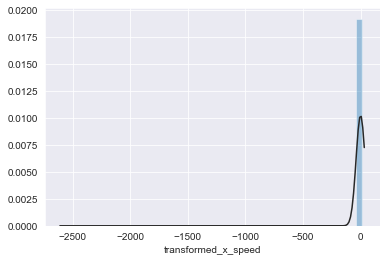

In [12]:
sns.distplot(july["transformed_x_speed"], fit=norm, kde=False)

In [25]:
mean,std=norm.fit(july["transformed_x_speed"])

In [26]:
print(mean)

-3.0715556946275093


In [15]:
mean,std=norm.fit(july["transformed_y_speed"])

In [16]:
print(mean)

-2.2398281676722807
